## Импорт модулей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List

import wbgapi as wb   # World Bank's data API

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward

from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

## Функции

In [2]:
def save_as_xlsx(path: str, sheet_names: List[str], df_list: List[pd.DataFrame]) -> None:
    if len(sheet_names) != len(df_list): return

    writer = pd.ExcelWriter(path, engine="xlsxwriter")
    for i in range(len(sheet_names)):
        df_list[i].to_excel(writer, sheet_name=sheet_names[i])
    writer.close()

## Данных

Данные были взяты из API $\,$ [Всемирного банка](https://data.worldbank.org/indicator)

\[28.09.2022\]

#### Список объединений стран

In [3]:
with open("./data/CountryAlliances", "r") as f:
    country_alliances = list(map(lambda x: x[:-1], f.readlines()))

#### Темы роста ВВП (%)

In [4]:
df_gdp_growth_data = pd.read_csv("./data/GDP_growth.csv", skiprows=4)
df_gdp_growth_data = df_gdp_growth_data.loc[~df_gdp_growth_data["Country Name"].isin(country_alliances)]
df_gdp_growth_data.head()

# df_gdp_growth_data = wb.data.DataFrame("NY.GDP.MKTP.KD.ZG", labels=True)
# df_gdp_growth_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.035375,6.429817,-0.020479,3.543630,2.116716,5.482371,1.267218,-2.085600,-22.318948,NaN
1,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,NaN
2,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.540000,4.950000,4.820000,0.940000,-2.580000,-0.150000,-1.316312,-0.700000,-5.500000,0.700000
3,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.417243,1.002018,1.774449,2.218726,3.314981,3.802227,4.019360,2.088063,-3.481630,8.544083
4,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,2.015548,-11.183940,8.949418


#### Подушевой ВВП (current US$)

In [5]:
df_gdp_per_capita_data = pd.read_csv("./data/GDP_per_capita_growth.csv", skiprows=4)
df_gdp_per_capita_data = df_gdp_per_capita_data.loc[~df_gdp_per_capita_data["Country Name"].isin(country_alliances)]
df_gdp_per_capita_data.head()

# df_gdp_per_capita_data = wb.data.DataFrame("NY.GDP.PCAP.CD", labels=True)
# df_gdp_per_capita_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,30253.714235,31135.884356,23384.298791,NaN,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.8609,58.458009,78.706429,82.095307,101.108325,...,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393,NaN
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4413.062005,4578.633208,3952.802538,4124.055390,4531.019374,5287.663694,5396.215864,5332.160475,6494.385713,NaN
6,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,39538.355206,41302.382143,35770.918653,37474.745840,38964.662014,41793.318837,40898.417906,37416.697720,43047.686270,NaN


#### Темп инфляции (%)

In [6]:
df_inflation_data = pd.read_csv("./data/Inflation.csv", skiprows=4)
df_inflation_data = df_inflation_data.loc[~df_inflation_data["Country Name"].isin(country_alliances)]
df_inflation_data.head()

# df_inflation_data = wb.data.DataFrame("NY.GDP.DEFL.KD.ZG", labels=True)
# df_inflation_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.986755,2.335109,2.531592,-1.389713,-1.753935,2.263271,5.568805,-2.902756,NaN,NaN
2,Afghanistan,AFG,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.822785,0.566945,2.447563,-2.197526,2.403656,2.071349,6.521480,7.821667,NaN,NaN
4,Angola,AGO,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.844244,3.563413,-3.514972,21.774174,22.617936,28.167029,19.184276,18.036768,44.384448,NaN
5,Albania,ALB,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288746,1.549917,0.563991,-0.632653,1.451063,1.473058,1.256590,0.678486,5.924809,NaN
6,Andorra,AND,"Inflation, GDP deflator (annual %)",NY.GDP.DEFL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.448492,-0.084019,0.660589,0.347795,1.136509,1.012478,1.374754,1.113786,2.096461,NaN


## 2019 год

### Кластеризация на основании темпов роста ВВП

Выбираем нужные данные

In [7]:
df_gdp_growth_2019 = df_gdp_growth_data[["Country Name", "2019"]].dropna()
df_gdp_growth_2019 = df_gdp_growth_2019.rename({"2019": "GDP Growth"}, axis=1)
df_gdp_growth_2019

,Country Name,GDP Growth
0,Aruba,-2.085600
1,Afghanistan,3.911603
2,Angola,-0.700000
3,Albania,2.088063
4,Andorra,2.015548
...,...,...
212,Kosovo,4.756831
213,"Yemen, Rep.",1.400000
214,South Africa,0.113054
215,Zambia,1.441306


На основании дендрограммы определяем количество кластеров

In [8]:
number_of_cluster = 5

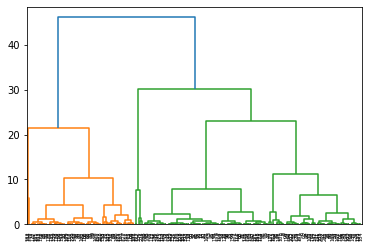

In [9]:
data_2d_gdp_growth_2019 = np.reshape(df_gdp_growth_2019["GDP Growth"].values, (len(df_gdp_growth_2019["GDP Growth"].values), 1))

dendrogram = sch.dendrogram(ward(data_2d_gdp_growth_2019))
plt.show()

Кластеризируем данные

In [10]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_2d_gdp_growth_2019)

In [11]:
dict_names_gdp_2019 = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names_gdp_2019[y_hc[i]].append(df_gdp_growth_2019["Country Name"].values[i])

Название стран в кластерах

In [12]:
df_names_gdp_2019 = pd.DataFrame.from_dict(dict_names_gdp_2019, orient="index").transpose()

In [13]:
df_names_gdp_2019.head()

,0,1,2,3,4
0,Aruba,Armenia,Equatorial Guinea,Afghanistan,Timor-Leste
1,Angola,Antigua and Barbuda,Lebanon,Albania,Tuvalu
2,Argentina,Benin,Libya,Andorra,None
3,American Samoa,Burkina Faso,Northern Mariana Islands,United Arab Emirates,None
4,Austria,Bangladesh,Zimbabwe,Australia,None


Значения темпов роста ВВП в кластерах

In [14]:
dict_vals_gdp_2019 = {i: [df_gdp_growth_2019.loc[df_gdp_growth_2019["Country Name"] == df_names_gdp_2019[i][j]]["GDP Growth"].values[0] for j in range(len(df_names_gdp_2019[i].dropna()))] for i in range(number_of_cluster)}

In [15]:
df_vals_gdp_2019 = pd.DataFrame.from_dict(dict_vals_gdp_2019, orient="index").transpose()

In [16]:
df_vals_gdp_2019.head()

,0,1,2,3,4
0,-2.085600,7.600000,-5.481823,3.911603,19.535810
1,-0.700000,4.862236,-6.914925,2.088063,13.793103
2,-2.025934,6.865687,-11.195695,2.015548,NaN
3,-0.487805,5.688115,-11.142587,3.411539,NaN
4,1.491211,7.881915,-6.144236,2.113149,NaN


Минимум, максимум, среднее

In [17]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2019.agg(aggrigate)

,0,1,2,3,4
count,57.000000,64.000000,5.000000,77.000000,2.000000
min,-3.779889,4.331735,-11.195695,1.671944,13.793103
max,1.491211,9.460598,-5.481823,4.188260,19.535810
mean,-0.090235,5.739661,-8.175853,2.740411,16.664457


Записываем получившиеся результаты в `excel`-файл

In [18]:
save_as_xlsx("./results/gdp_growth_2019.xlsx",
             ["Country Names", "GDP growth"],
             [df_names_gdp_2019, df_vals_gdp_2019])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП

Выбираем нужные данные

In [19]:
df_gdp_per_capita_2019 = df_gdp_per_capita_data[["Country Name", "2019"]].dropna()
df_gdp_per_capita_2019 = df_gdp_per_capita_2019.rename({"2019": "GDP per capita"}, axis=1)
df_gdp_per_capita_2019.head()

,Country Name,GDP per capita
0,Aruba,31135.884356
2,Afghanistan,494.179350
4,Angola,2177.799015
5,Albania,5396.215864
6,Andorra,40898.417906


In [20]:
df_gdp_per_capita_gdp_growth_2019 = pd.merge(df_gdp_growth_2019, df_gdp_per_capita_2019, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_2019.head()

,Country Name,GDP Growth,GDP per capita
0,Aruba,-2.085600,31135.884356
1,Afghanistan,3.911603,494.179350
2,Angola,-0.700000,2177.799015
3,Albania,2.088063,5396.215864
4,Andorra,2.015548,40898.417906


In [21]:
data_gdp_per_capita_gdp_growth_2019 = df_gdp_per_capita_gdp_growth_2019.loc[:, "GDP Growth":"GDP per capita"].values

Стандартизация показателей

In [22]:
data_gdp_per_capita_gdp_growth_2019_std = (data_gdp_per_capita_gdp_growth_2019 - data_gdp_per_capita_gdp_growth_2019.mean()) / data_gdp_per_capita_gdp_growth_2019.std()

На основании дендрограммы определяем количество кластеров

In [23]:
number_of_cluster = 5

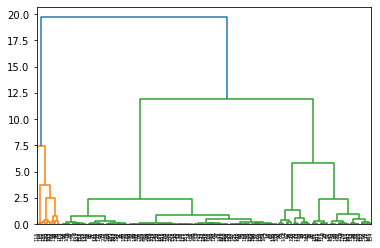

In [24]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_2019_std))
plt.show()

Кластеризируем данные

In [25]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_2019_std)

In [26]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_per_capita_gdp_growth_2019["Country Name"].values[i])

Название стран в кластерах

In [27]:
df_names_gdp_capita_2019 = pd.DataFrame.from_dict(dict_names, orient="index")
df_names_gdp_capita_2019 = df_names_gdp_capita_2019.transpose()

In [28]:
df_names_gdp_capita_2019.head()

,0,1,2,3,4
0,Bermuda,Aruba,Afghanistan,Monaco,Andorra
1,Switzerland,Antigua and Barbuda,Angola,None,United Arab Emirates
2,Cayman Islands,Bahrain,Albania,None,Australia
3,Denmark,"Bahamas, The",Argentina,None,Austria
4,Isle of Man,Barbados,Armenia,None,Belgium


Значения темпов роста ВВП в кластерах

In [29]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_2019.loc[df_gdp_per_capita_gdp_growth_2019["Country Name"] == df_names_gdp_capita_2019[i][j]]["GDP Growth"].values[0] for j in range(len(df_names_gdp_capita_2019[i].dropna()))] for i in range(number_of_cluster)}

In [30]:
df_vals_gdp_per_capita_2019 = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [31]:
df_vals_gdp_per_capita_2019.head()

,0,1,2,3,4
0,0.306267,-2.085600,3.911603,6.905665,2.015548
1,1.210992,4.862236,-0.700000,NaN,3.411539
2,3.873077,2.166965,2.088063,NaN,2.113149
3,2.114664,1.896164,-2.025934,NaN,1.491211
4,0.254861,-0.610275,7.600000,NaN,2.111532


Минимум, максимум, среднее значения темпов роста ВВП в кластерах

In [32]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-2.511980,-11.142587,-11.195695,6.905665,-1.678267
max,4.917007,5.861136,19.535810,6.905665,3.773590
mean,1.646049,1.817608,3.248102,6.905665,1.822838


Значения подушевого ВВП в кластерах

In [33]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_2019.loc[df_gdp_per_capita_gdp_growth_2019["Country Name"] == df_names_gdp_capita_2019[i][j]]["GDP per capita"].values[0] for j in range(len(df_names_gdp_capita_2019[i].dropna()))] for i in range(number_of_cluster)}

In [34]:
df_vals_capita_per_capita_2019 = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [35]:
df_vals_capita_per_capita_2019.head()

,0,1,2,3,4
0,116153.166122,31135.884356,494.179350,189487.147128,40898.417906
1,85334.519462,17376.649677,2177.799015,NaN,42701.443045
2,91513.042673,23552.379948,5396.215864,NaN,54875.285956
3,59775.735096,33872.334307,10076.355241,NaN,50114.401110
4,86481.552591,18480.056593,4604.646324,NaN,46599.111335


Минимум, максимум, среднее значения подушевого ВВП в кластерах

In [36]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


Записываем получившиеся результаты в `excel`-файл

In [37]:
save_as_xlsx("./results/gdp_growth_gdp_per_capita_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita"],
             [df_names_gdp_capita_2019, df_vals_gdp_per_capita_2019, df_vals_capita_per_capita_2019])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП, темов инфляции

Выбираем нужные данные

In [38]:
df_inflation_2019 = df_inflation_data[["Country Name", "2019"]].dropna()
df_inflation_2019 = df_inflation_2019.rename({"2019": "Inflation"}, axis=1)
df_inflation_2019.head()

,Country Name,Inflation
0,Aruba,5.568805
2,Afghanistan,6.521480
4,Angola,19.184276
5,Albania,1.256590
6,Andorra,1.374754


In [39]:
df_gdp_per_capita_gdp_growth_inflation_2019 = pd.merge(df_gdp_per_capita_gdp_growth_2019, df_inflation_2019, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_inflation_2019.head()

,Country Name,GDP Growth,GDP per capita,Inflation
0,Aruba,-2.085600,31135.884356,5.568805
1,Afghanistan,3.911603,494.179350,6.521480
2,Angola,-0.700000,2177.799015,19.184276
3,Albania,2.088063,5396.215864,1.256590
4,Andorra,2.015548,40898.417906,1.374754


In [40]:
data_gdp_per_capita_gdp_growth_inflation_2019 = df_gdp_per_capita_gdp_growth_2019.loc[:, "GDP Growth":"Inflation"].values

Стандартизация показателей

In [41]:
data_gdp_per_capita_gdp_growth_inflation_2019_std = (data_gdp_per_capita_gdp_growth_inflation_2019 - data_gdp_per_capita_gdp_growth_inflation_2019.mean()) / data_gdp_per_capita_gdp_growth_inflation_2019.std()

На основании дендрограммы определяем количество кластеров

In [42]:
number_of_cluster = 5

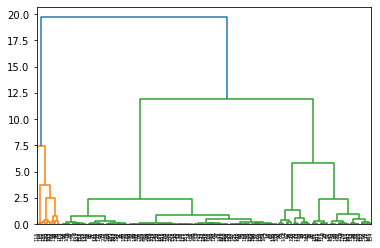

In [43]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_inflation_2019_std))
plt.show()

Кластеризируем данные

In [44]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_inflation_2019_std)

In [45]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_inflation_2019["Country Name"].values[i])

Название стран в кластерах

In [46]:
df_names_gdp_capita_inflation_2019 = pd.DataFrame.from_dict(dict_names, orient="index")
df_names_gdp_capita_inflation_2019 = df_names_gdp_capita_inflation_2019.transpose()

In [47]:
df_names_gdp_capita_inflation_2019.head()

,0,1,2,3,4
0,Bermuda,Aruba,Afghanistan,Monaco,Andorra
1,Switzerland,Antigua and Barbuda,Angola,None,United Arab Emirates
2,Cayman Islands,Bahrain,Albania,None,Australia
3,Denmark,"Bahamas, The",Argentina,None,Austria
4,Isle of Man,Barbados,Armenia,None,Belgium


Значения темпов роста ВВП в кластерах

In [48]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_inflation_2019.loc[df_gdp_per_capita_gdp_growth_inflation_2019["Country Name"] == df_names_gdp_capita_inflation_2019[i][j]]["GDP Growth"].values[0] for j in range(len(df_names_gdp_capita_inflation_2019[i].dropna()))] for i in range(number_of_cluster)}

In [49]:
df_vals_gdp_inflation_2019 = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [50]:
df_vals_gdp_inflation_2019.head()

,0,1,2,3,4
0,0.306267,-2.085600,3.911603,6.905665,2.015548
1,1.210992,4.862236,-0.700000,NaN,3.411539
2,3.873077,2.166965,2.088063,NaN,2.113149
3,2.114664,1.896164,-2.025934,NaN,1.491211
4,0.254861,-0.610275,7.600000,NaN,2.111532


Минимум, максимум, среднее значения темпов роста ВВП в кластерах

In [51]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-2.511980,-11.142587,-11.195695,6.905665,-1.678267
max,4.917007,5.861136,19.535810,6.905665,3.773590
mean,1.646049,1.817608,3.248102,6.905665,1.822838


Значения подушевого ВВП в кластерах

In [52]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_inflation_2019.loc[df_gdp_per_capita_gdp_growth_inflation_2019["Country Name"] == df_names_gdp_capita_inflation_2019[i][j]]["GDP per capita"].values[0] for j in range(len(df_names_gdp_capita_inflation_2019[i].dropna()))] for i in range(number_of_cluster)}

In [53]:
df_vals_capita_inflation_2019 = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [54]:
df_vals_capita_inflation_2019.head()

,0,1,2,3,4
0,116153.166122,31135.884356,494.179350,189487.147128,40898.417906
1,85334.519462,17376.649677,2177.799015,NaN,42701.443045
2,91513.042673,23552.379948,5396.215864,NaN,54875.285956
3,59775.735096,33872.334307,10076.355241,NaN,50114.401110
4,86481.552591,18480.056593,4604.646324,NaN,46599.111335


Минимум, максимум, среднее значения подушевого ВВП в кластерах

In [55]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


Значения темпа инфляции в кластерах

In [56]:
dict_inflation = {i: [df_gdp_per_capita_gdp_growth_inflation_2019.loc[df_gdp_per_capita_gdp_growth_inflation_2019["Country Name"] == df_names_gdp_capita_inflation_2019[i][j]]["Inflation"].values[0] for j in range(len(df_names_gdp_capita_inflation_2019[i].dropna()))] for i in range(number_of_cluster)}

In [57]:
df_vals_inflation_inflation_2019 = pd.DataFrame.from_dict(dict_inflation, orient="index").transpose()

In [58]:
df_vals_inflation_inflation_2019.head()

,0,1,2,3,4
0,2.419352,5.568805,6.521480,1.279273,1.374754
1,-0.105745,0.208077,19.184276,NaN,-4.444037
2,3.464413,0.083262,1.256590,NaN,3.418786
3,0.742103,1.501262,50.921499,NaN,1.622589
4,1.800021,4.697597,1.065623,NaN,1.794827


Минимум, максимум, среднее значения показателя инфляции в кластерах

In [59]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-4.826866,-3.335768,-3.417863,1.279273,-4.444037
max,4.589431,8.522967,440.829791,1.279273,3.489567
mean,1.288131,1.638456,7.968013,1.279273,1.619152


Записываем получившиеся результаты в `excel`-файл

In [60]:
save_as_xlsx("./results/gdp_per_capita_gdp_growth_inflation_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita", "Inflation"],
             [df_names_gdp_capita_inflation_2019, df_vals_gdp_inflation_2019, df_vals_capita_inflation_2019, df_vals_inflation_inflation_2019])

## 2013 год

### Кластеризация на основании темпов роста ВВП

Выбираем нужные данные

In [61]:
df_gdp_growth_2013 = df_gdp_growth_data[["Country Name", "2013"]].dropna()
df_gdp_growth_2013 = df_gdp_growth_2013.rename({"2013": "GDP Growth"}, axis=1)
df_gdp_growth_2013.head()

,Country Name,GDP Growth
0,Aruba,6.429817
1,Afghanistan,5.600745
2,Angola,4.950000
3,Albania,1.002018
4,Andorra,-3.547597


На основании дендрограммы определяем количество кластеров

In [62]:
number_of_cluster = 5

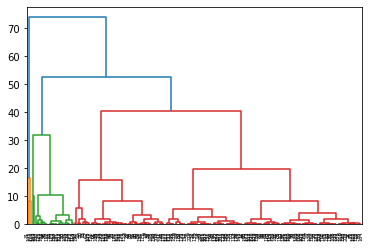

In [63]:
data_2d_gdp_growth_2013 = np.reshape(df_gdp_growth_2013["GDP Growth"].values, (len(df_gdp_growth_2013["GDP Growth"].values), 1))

dendrogram = sch.dendrogram(ward(data_2d_gdp_growth_2013))
plt.show()

Кластеризируем данные

In [64]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_2d_gdp_growth_2013)

In [65]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_growth_2013["Country Name"].values[i])

Название стран в кластерах

In [66]:
df_names_gdp_2013 = pd.DataFrame.from_dict(dict_names, orient="index").transpose()

In [67]:
df_names_gdp_2013.head()

,0,1,2,3,4
0,Aruba,Central African Republic,Benin,Albania,Nauru
1,Afghanistan,Libya,Botswana,Andorra,Sierra Leone
2,Angola,Syrian Arab Republic,China,American Samoa,None
3,United Arab Emirates,None,Cote d'Ivoire,Antigua and Barbuda,None
4,Argentina,None,"Congo, Dem. Rep.",Austria,None


Значения темпов роста ВВП в кластерах

In [68]:
dict_vals = {i: [df_gdp_growth_2013.loc[df_gdp_growth_2013["Country Name"] == df_names_gdp_2013[i][j]]["GDP Growth"].values[0] for j in range(len(df_names_gdp_2013[i].dropna()))] for i in range(number_of_cluster)}

In [69]:
df_vals_gdp_2013 = pd.DataFrame.from_dict(dict_vals, orient="index").transpose()

In [70]:
df_vals_gdp_2013.head()

,0,1,2,3,4
0,6.429817,-36.391977,7.191434,1.002018,30.612245
1,5.600745,-17.997962,11.343397,-3.547597,20.715768
2,4.950000,-26.300088,7.766150,-2.500000,NaN
3,5.053078,NaN,10.760213,-0.600876,NaN
4,2.405324,NaN,8.481957,0.025505,NaN


Минимум, максимум, среднее

In [71]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2013.agg(aggrigate)

,0,1,2,3,4
count,121.000000,3.000000,24.000000,56.000000,2.000000
min,1.690408,-36.391977,7.191434,-6.553078,20.715768
max,6.963607,-17.997962,13.129731,1.458429,30.612245
mean,3.994569,-26.896675,9.044068,-0.634174,25.664007


Записываем получившиеся результаты в `excel`-файл

In [72]:
save_as_xlsx("./results/gdp_growth_2013.xlsx",
             ["Country Names", "GDP growth"],
             [df_names_gdp_2013, df_vals_gdp_2013])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП

Выбираем нужные данные

In [73]:
df_gdp_per_capita_2013 = df_gdp_per_capita_data[["Country Name", "2013"]].dropna()
df_gdp_per_capita_2013 = df_gdp_per_capita_2013.rename({"2013": "GDP per capita"}, axis=1)
df_gdp_per_capita_2013.head()

,Country Name,GDP per capita
0,Aruba,26442.426801
2,Afghanistan,624.315455
4,Angola,5127.717243
5,Albania,4413.062005
6,Andorra,39538.355206


In [74]:
df_gdp_per_capita_gdp_growth_2013 = pd.merge(df_gdp_growth_2013, df_gdp_per_capita_2013, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_2013.head()

,Country Name,GDP Growth,GDP per capita
0,Aruba,6.429817,26442.426801
1,Afghanistan,5.600745,624.315455
2,Angola,4.950000,5127.717243
3,Albania,1.002018,4413.062005
4,Andorra,-3.547597,39538.355206


In [75]:
data_gdp_per_capita_gdp_growth_2013 = df_gdp_per_capita_gdp_growth_2013.loc[:, "GDP Growth":"GDP per capita"].values

Стандартизация показателей

In [76]:
data_gdp_per_capita_gdp_growth_2013_std = (data_gdp_per_capita_gdp_growth_2013 - data_gdp_per_capita_gdp_growth_2013.mean()) / data_gdp_per_capita_gdp_growth_2013.std()

На основании дендрограммы определяем количество кластеров

In [77]:
number_of_cluster = 5

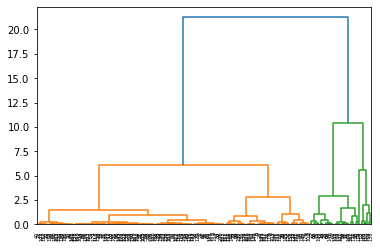

In [78]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_2013_std))
plt.show()

Кластеризируем данные

In [79]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_2013_std)

In [80]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_gdp_per_capita_gdp_growth_2013["Country Name"].values[i])

Название стран в кластерах

In [81]:
df_names_gdp_capita_2013 = pd.DataFrame.from_dict(dict_names, orient="index")
df_names_gdp_capita_2013 = df_names_gdp_capita_2013.transpose()

In [82]:
df_names_gdp_capita_2013.head()

,0,1,2,3,4
0,Andorra,Aruba,Bermuda,Afghanistan,Monaco
1,United Arab Emirates,Argentina,Switzerland,Angola,None
2,Australia,American Samoa,Isle of Man,Albania,None
3,Austria,Antigua and Barbuda,Luxembourg,Armenia,None
4,Belgium,Bahrain,"Macao SAR, China",Azerbaijan,None


Значения темпов роста ВВП в кластерах

In [83]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_2013.loc[df_gdp_per_capita_gdp_growth_2013["Country Name"] == df_names_gdp_capita_2013[i][j]]["GDP Growth"].values[0] for j in range(len(df_names_gdp_capita_2013[i].dropna()))] for i in range(number_of_cluster)}

In [84]:
df_vals_gdp_per_capita_2013 = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [85]:
df_vals_gdp_per_capita_2013.head()

,0,1,2,3,4
0,-3.547597,6.429817,-0.279709,5.600745,9.574891
1,5.053078,2.405324,1.821668,4.950000,NaN
2,2.600212,-2.500000,4.141719,1.002018,NaN
3,0.025505,-0.600876,3.171790,3.300000,NaN
4,0.459242,5.416840,10.752807,5.809801,NaN


Минимум, максимум, среднее значения темпов роста ВВП в кластерах

In [86]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-6.285155,-17.997962,-0.279709,-36.391977,9.574891
max,5.053078,30.612245,10.752807,20.715768,9.574891
mean,0.987843,1.936236,3.742627,4.046827,9.574891


Значения подушевого ВВП в кластерах

In [87]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_2013.loc[df_gdp_per_capita_gdp_growth_2013["Country Name"] == df_names_gdp_capita_2013[i][j]]["GDP per capita"].values[0] for j in range(len(df_names_gdp_capita_2013[i].dropna()))] for i in range(number_of_cluster)}

In [88]:
df_vals_capita_per_capita_2013 = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [89]:
df_vals_capita_per_capita_2013.head()

,0,1,2,3,4
0,39538.355206,26442.426801,99471.638898,624.315455,177673.745368
1,42412.636491,13080.254732,88109.486752,5127.717243,NaN
2,68156.627916,11450.724195,83357.132684,4413.062005,NaN
3,50731.127254,12910.590626,120000.140730,3838.173880,NaN
4,46757.951856,24744.296959,89260.757104,7875.756953,NaN


Минимум, максимум, среднее значения подушевого ВВП в кластерах

In [90]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Записываем получившиеся результаты в `excel`-файл

In [91]:
save_as_xlsx("./results/gdp_growth_gdp_per_capita_2013.xlsx",
             ["Country Names", "GDP growth", "GDP per capita"],
             [df_names_gdp_capita_2013, df_vals_gdp_per_capita_2013, df_vals_capita_per_capita_2013])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП, темов инфляции

Выбираем нужные данные

In [92]:
df_inflation_2013 = df_inflation_data[["Country Name", "2013"]].dropna()
df_inflation_2013 = df_inflation_2013.rename({"2013": "Inflation"}, axis=1)
df_inflation_2013.head()

,Country Name,Inflation
0,Aruba,-1.986755
2,Afghanistan,4.822785
4,Angola,2.844244
5,Albania,0.288746
6,Andorra,0.448492


In [93]:
df_gdp_per_capita_gdp_growth_inflation_2013 = pd.merge(df_gdp_per_capita_gdp_growth_2013, df_inflation_2013, left_on="Country Name", right_on="Country Name", how="left")
df_gdp_per_capita_gdp_growth_inflation_2013.head()

,Country Name,GDP Growth,GDP per capita,Inflation
0,Aruba,6.429817,26442.426801,-1.986755
1,Afghanistan,5.600745,624.315455,4.822785
2,Angola,4.950000,5127.717243,2.844244
3,Albania,1.002018,4413.062005,0.288746
4,Andorra,-3.547597,39538.355206,0.448492


In [94]:
data_gdp_per_capita_gdp_growth_inflation_2013 = df_gdp_per_capita_gdp_growth_2013.loc[:, "GDP Growth":"Inflation"].values

Стандартизация показателей

In [95]:
data_gdp_per_capita_gdp_growth_inflation_2013_std = (data_gdp_per_capita_gdp_growth_inflation_2013 - data_gdp_per_capita_gdp_growth_inflation_2013.mean()) / data_gdp_per_capita_gdp_growth_inflation_2013.std()

На основании дендрограммы определяем количество кластеров

In [96]:
number_of_cluster = 5

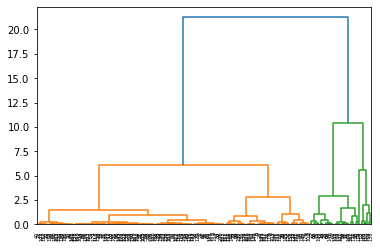

In [97]:
dendrogram = sch.dendrogram(ward(data_gdp_per_capita_gdp_growth_inflation_2013_std))
plt.show()

Кластеризируем данные

In [98]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_gdp_per_capita_gdp_growth_inflation_2013_std)

In [99]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_inflation_2013["Country Name"].values[i])

Название стран в кластерах

In [100]:
df_names_inflation_2013 = pd.DataFrame.from_dict(dict_names, orient="index")
df_names_inflation_2013 = df_names_inflation_2013.transpose()

In [101]:
df_names_inflation_2013.head()

,0,1,2,3,4
0,Andorra,Aruba,Bermuda,Afghanistan,Monaco
1,United Arab Emirates,Argentina,Switzerland,Angola,None
2,Australia,American Samoa,Isle of Man,Albania,None
3,Austria,Antigua and Barbuda,Luxembourg,Armenia,None
4,Belgium,Bahrain,"Macao SAR, China",Azerbaijan,None


Значения темпов роста ВВП в кластерах

In [102]:
dict_gdp = {i: [df_gdp_per_capita_gdp_growth_inflation_2013.loc[df_gdp_per_capita_gdp_growth_inflation_2013["Country Name"] == df_names_inflation_2013[i][j]]["GDP Growth"].values[0] for j in range(len(df_names_inflation_2013[i].dropna()))] for i in range(number_of_cluster)}

In [103]:
df_vals_gdp_inflation_2013 = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [104]:
df_vals_gdp_inflation_2013.head()

,0,1,2,3,4
0,-3.547597,6.429817,-0.279709,5.600745,9.574891
1,5.053078,2.405324,1.821668,4.950000,NaN
2,2.600212,-2.500000,4.141719,1.002018,NaN
3,0.025505,-0.600876,3.171790,3.300000,NaN
4,0.459242,5.416840,10.752807,5.809801,NaN


Минимум, максимум, среднее значения темпов роста ВВП в кластерах

In [105]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-6.285155,-17.997962,-0.279709,-36.391977,9.574891
max,5.053078,30.612245,10.752807,20.715768,9.574891
mean,0.987843,1.936236,3.742627,4.046827,9.574891


Значения подушевого ВВП в кластерах

In [106]:
dict_gdp_per_capita = {i: [df_gdp_per_capita_gdp_growth_inflation_2013.loc[df_gdp_per_capita_gdp_growth_inflation_2013["Country Name"] == df_names_inflation_2013[i][j]]["GDP per capita"].values[0] for j in range(len(df_names_inflation_2013[i].dropna()))] for i in range(number_of_cluster)}

In [107]:
df_vals_capita_inflation_2013 = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [108]:
df_vals_capita_inflation_2013.head()

,0,1,2,3,4
0,39538.355206,26442.426801,99471.638898,624.315455,177673.745368
1,42412.636491,13080.254732,88109.486752,5127.717243,NaN
2,68156.627916,11450.724195,83357.132684,4413.062005,NaN
3,50731.127254,12910.590626,120000.140730,3838.173880,NaN
4,46757.951856,24744.296959,89260.757104,7875.756953,NaN


Минимум, максимум, среднее значения подушевого ВВП в кластерах

In [109]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Значения темпа инфляции в кластерах

In [110]:
dict_inflation = {i: [df_gdp_per_capita_gdp_growth_inflation_2013.loc[df_gdp_per_capita_gdp_growth_inflation_2013["Country Name"] == df_names_inflation_2013[i][j]]["Inflation"].values[0] for j in range(len(df_names_inflation_2013[i].dropna()))] for i in range(number_of_cluster)}

In [111]:
df_vals_inflation_inflation_2013 = pd.DataFrame.from_dict(dict_inflation, orient="index").transpose()

In [112]:
df_vals_inflation_inflation_2013.head()

,0,1,2,3,4
0,0.448492,-1.986755,1.657273,4.822785,0.780385
1,-0.866918,23.948798,-0.023308,2.844244,NaN
2,-0.152592,2.243590,1.535803,0.288746,NaN
3,1.623888,-0.946544,2.276024,3.366825,NaN
4,1.271258,0.384140,7.732683,0.445065,NaN


Минимум, максимум, среднее значения инфляции в кластерах

In [113]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-2.821321,-21.808511,-0.023308,-4.141367,0.780385
max,4.227317,35.502675,7.732683,54.012912,0.780385
mean,0.987351,2.635390,2.357308,5.552653,0.780385


Записываем получившиеся результаты в `excel`-файл

In [114]:
save_as_xlsx("./results/gdp_per_capita_gdp_growth_inflation_2013.xlsx",
             ["Country Names", "GDP growth", "GDP per capita", "Inflation"],
             [df_names_inflation_2013, df_vals_gdp_inflation_2013, df_vals_capita_inflation_2013, df_vals_inflation_inflation_2013])

## 2013 - 2019 года

### Кластеризация на основании темпов роста ВВП

Выбираем нужные данные

In [115]:
df_mean = pd.DataFrame(df_gdp_growth_data.loc[:, "2013":"2019"].dropna().mean(axis=1)).rename({0: "Mean GDP Growth"}, axis=1)
df_mean.head()

,Mean GDP Growth
0,2.390525
1,2.826393
2,0.851955
3,2.602832
4,1.150153


In [116]:
df_mean_gdp_growth_2013_2019 = pd.merge(df_gdp_growth_data["Country Name"], df_mean, left_index=True, right_index=True)
df_mean_gdp_growth_2013_2019.head()

,Country Name,Mean GDP Growth
0,Aruba,2.390525
1,Afghanistan,2.826393
2,Angola,0.851955
3,Albania,2.602832
4,Andorra,1.150153


На основании дендрограммы определяем количество кластеров

In [117]:
number_of_cluster = 5

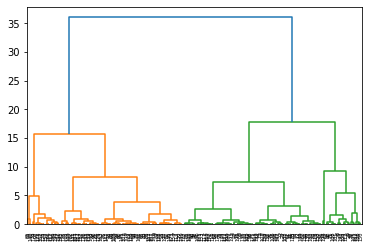

In [118]:
data_2d_mean_gdp_growth_2013_2019 = np.reshape(df_mean_gdp_growth_2013_2019["Mean GDP Growth"].values, (len(df_mean_gdp_growth_2013_2019["Mean GDP Growth"].values), 1))

dendrogram = sch.dendrogram(ward(data_2d_mean_gdp_growth_2013_2019))
plt.show()

Кластеризируем данные

In [119]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_2d_mean_gdp_growth_2013_2019)

In [120]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_mean_gdp_growth_2013_2019["Country Name"].values[i])

Название стран в кластерах

In [121]:
df_names_gdp_mean_2013_2019 = pd.DataFrame.from_dict(dict_names, orient="index").transpose()

In [122]:
df_names_gdp_mean_2013_2019.head()

,0,1,2,3,4
0,United Arab Emirates,Argentina,Aruba,Bangladesh,Equatorial Guinea
1,Armenia,American Samoa,Afghanistan,China,"Yemen, Rep."
2,Antigua and Barbuda,Belarus,Angola,Cote d'Ivoire,None
3,Benin,Bermuda,Albania,Ethiopia,None
4,Burkina Faso,Brazil,Andorra,Guinea,None


Значения темпов роста ВВП в кластерах

In [123]:
dict_vals = {i: [df_mean_gdp_growth_2013_2019.loc[df_mean_gdp_growth_2013_2019["Country Name"] == df_names_gdp_mean_2013_2019[i][j]]["Mean GDP Growth"].values[0] for j in range(len(df_names_gdp_mean_2013_2019[i].dropna()))] for i in range(number_of_cluster)}

In [124]:
df_vals_gdp_mean_2013_2019 = pd.DataFrame.from_dict(dict_vals, orient="index").transpose()

In [125]:
df_vals_gdp_mean_2013_2019.head()

,0,1,2,3,4
0,3.497523,-0.183041,2.390525,6.790337,-5.575781
1,4.371429,-0.581604,2.826393,6.961354,-5.093454
2,3.915258,0.493603,0.851955,7.855306,NaN
3,5.414491,-0.053938,2.602832,9.344305,NaN
4,5.499259,0.144916,1.150153,6.366311,NaN


Минимум, максимум, среднее

In [126]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_mean_2013_2019.agg(aggrigate)

,0,1,2,3,4
count,74.000000,22.000000,84.000000,20.000000,2.000000
min,3.258885,-2.514906,0.724999,6.366311,-5.575781
max,6.111602,0.515022,3.112407,9.344305,-5.093454
mean,4.381884,-0.464091,2.028684,7.190985,-5.334617


Записываем получившиеся результаты в `excel`-файл

In [127]:
save_as_xlsx("./results/mean_gdp_growth_2013_2019.xlsx",
             ["Country Names", "Mean GDP growth"],
             [df_names_gdp_mean_2013_2019, df_vals_gdp_mean_2013_2019])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП

Выбираем нужные данные

In [128]:
df_mean_gdp_per_capita_2013_2019 = pd.DataFrame(df_gdp_per_capita_data.loc[:, "2013":"2019"].dropna().mean(axis=1)).rename({0: "Mean GDP per capita"}, axis=1)
df_mean_gdp_per_capita_2013_2019.head()

,Mean GDP per capita
0,28704.038175
2,543.298061
4,3156.243715
5,4611.921725
6,39391.828657


In [129]:
df_mean_gdp_growth_gdp_per_capita_2013_2019 = pd.merge(df_mean_gdp_growth_2013_2019, df_mean_gdp_per_capita_2013_2019, left_index=True, right_index=True)
df_mean_gdp_growth_gdp_per_capita_2013_2019.head()

,Country Name,Mean GDP Growth,Mean GDP per capita
0,Aruba,2.390525,28704.038175
2,Angola,0.851955,543.298061
4,Andorra,1.150153,3156.243715
5,United Arab Emirates,3.497523,4611.921725
6,Argentina,-0.183041,39391.828657


In [130]:
data_mean_gdp_growth_gdp_per_capita_2013_2019 = df_mean_gdp_growth_gdp_per_capita_2013_2019.loc[:, "Mean GDP Growth":"Mean GDP per capita"].values

Стандартизация показателей

In [131]:
data_mean_gdp_growth_gdp_per_capita_2013_2019_std = (data_mean_gdp_growth_gdp_per_capita_2013_2019 - data_mean_gdp_growth_gdp_per_capita_2013_2019.mean()) / data_mean_gdp_growth_gdp_per_capita_2013_2019.std()

На основании дендрограммы определяем количество кластеров

In [132]:
number_of_cluster = 5

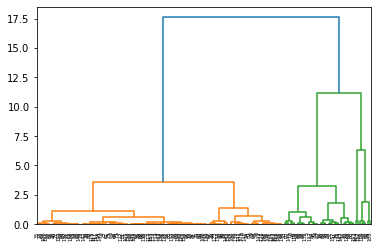

In [133]:
dendrogram = sch.dendrogram(ward(data_mean_gdp_growth_gdp_per_capita_2013_2019_std))
plt.show()

Кластеризируем данные

In [134]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_mean_gdp_growth_gdp_per_capita_2013_2019_std)

In [135]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_mean_gdp_growth_gdp_per_capita_2013_2019["Country Name"].values[i])

Название стран в кластерах

In [136]:
df_names_gdp_capita_mean_2013_2019 = pd.DataFrame.from_dict(dict_names, orient="index")
df_names_gdp_capita_mean_2013_2019 = df_names_gdp_capita_mean_2013_2019.transpose()

In [137]:
df_names_gdp_capita_mean_2013_2019.head()

,0,1,2,3,4
0,Aruba,Barbados,Antigua and Barbuda,Malaysia,Angola
1,Argentina,Cameroon,Austria,Oman,Andorra
2,American Samoa,Denmark,Azerbaijan,None,United Arab Emirates
3,Burundi,Liberia,Belarus,None,Australia
4,Belgium,Netherlands,Bhutan,None,Benin


Значения темпов роста ВВП в кластерах

In [138]:
dict_gdp = {i: [df_mean_gdp_growth_gdp_per_capita_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_2013_2019["Country Name"] == df_names_gdp_capita_mean_2013_2019[i][j]]["Mean GDP Growth"].values[0] for j in range(len(df_names_gdp_capita_mean_2013_2019[i].dropna()))] for i in range(number_of_cluster)}

In [139]:
df_vals_gdp_capita_mean_2013_2019 = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [140]:
df_vals_gdp_capita_mean_2013_2019.head()

,0,1,2,3,4
0,2.390525,0.327122,3.915258,5.048144,0.851955
1,-0.183041,4.555692,1.420299,2.435056,1.150153
2,-0.581604,2.152460,1.536326,NaN,3.497523
3,1.226763,1.280084,0.493603,NaN,2.479577
4,1.560133,1.810216,5.161124,NaN,5.414491


Минимум, максимум, среднее прироста ВВП в кластерах

In [141]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_capita_mean_2013_2019.agg(aggrigate)

,0,1,2,3,4
count,34.000000,6.000000,36.000000,2.000000,82.000000
min,-2.258107,0.327122,-2.514906,2.435056,-5.093454
max,7.457143,5.314645,8.583767,5.048144,9.344305
mean,2.859552,2.573370,2.949856,3.741600,3.058333


Значения подушевого ВВП в кластерах

In [142]:
dict_gdp_per_capita = {i: [df_mean_gdp_growth_gdp_per_capita_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_2013_2019["Country Name"] == df_names_gdp_capita_mean_2013_2019[i][j]]["Mean GDP per capita"].values[0] for j in range(len(df_names_gdp_capita_mean_2013_2019[i].dropna()))] for i in range(number_of_cluster)}

In [143]:
df_vals_capita_capita_mean_2013_2019 = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [144]:
df_vals_capita_capita_mean_2013_2019.head()

,0,1,2,3,4
0,28704.038175,106836.473070,12639.844618,171664.748058,543.298061
1,39391.828657,85816.947093,11616.366447,178015.298903,3156.243715
2,41450.753953,80352.524290,15048.008861,NaN,4611.921725
3,57606.774261,86012.561547,23765.413096,NaN,3966.176765
4,48721.577851,113815.259501,9984.770318,NaN,5548.686337


Минимум, максимум, среднее подушевого ВВП в кластерах

In [145]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_capita_mean_2013_2019.agg(aggrigate)

,0,1,2,3,4
count,34.000000,6.000000,36.000000,2.000000,82.000000
min,26865.120536,80352.524290,9298.382551,171664.748058,257.343706
max,68033.127896,113815.259501,23765.413096,178015.298903,8519.059570
mean,43618.765524,92743.514680,14691.554077,174840.023481,3207.159443


Записываем получившиеся результаты в `excel`-файл

In [146]:
save_as_xlsx("./results/mean_gdp_growth_gdp_per_capita_2013_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita"],
             [df_names_gdp_capita_mean_2013_2019, df_vals_gdp_capita_mean_2013_2019, df_vals_capita_capita_mean_2013_2019])

### Кластеризация на основании подушевого ВВП, темпов роста ВВП, темов инфляции

Выбираем нужные данные

In [147]:
df_mean_inflation_2013_2019 = pd.DataFrame(df_inflation_data.loc[:, "2013":"2019"].dropna().mean(axis=1)).rename({0: "Mean Inflation"}, axis=1)
df_mean_inflation_2013_2019.head()

,Mean Inflation
0,1.081196
2,2.376607
4,13.519443
5,0.850102
6,0.699514


In [148]:
df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019 = pd.merge(df_mean_gdp_growth_gdp_per_capita_2013_2019, df_mean_inflation_2013_2019, left_index=True, right_index=True)
df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.head()

,Country Name,Mean GDP Growth,Mean GDP per capita,Mean Inflation
0,Aruba,2.390525,28704.038175,1.081196
2,Angola,0.851955,543.298061,2.376607
4,Andorra,1.150153,3156.243715,13.519443
5,United Arab Emirates,3.497523,4611.921725,0.850102
6,Argentina,-0.183041,39391.828657,0.699514


In [149]:
data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019 = df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[:, "Mean GDP Growth":"Mean Inflation"].values

Стандартизация показателей

In [150]:
data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019_std = (data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019 - data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.mean()) / data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.std()

На основании дендрограммы определяем количество кластеров

In [151]:
number_of_cluster = 5

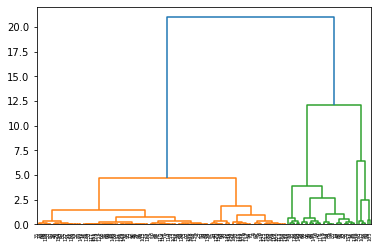

In [152]:
dendrogram = sch.dendrogram(ward(data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019_std))
plt.show()

Кластеризируем данные

In [153]:
hc = AgglomerativeClustering(n_clusters=number_of_cluster, affinity="euclidean", linkage="ward")

y_hc = hc.fit_predict(data_mean_gdp_growth_gdp_per_capita_inflation_2013_2019_std)

In [154]:
dict_names = {i: [] for i in range(number_of_cluster)}
for i in range(len(y_hc)):
    dict_names[y_hc[i]].append(df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"].values[i])

Название стран в кластерах

In [155]:
df_names_inflation_mean_2013_2019 = pd.DataFrame.from_dict(dict_names, orient="index")
df_names_inflation_mean_2013_2019 = df_names_inflation_mean_2013_2019.transpose()

In [156]:
df_names_inflation_mean_2013_2019.head()

,0,1,2,3,4
0,Aruba,Barbados,Antigua and Barbuda,Oman,Angola
1,Argentina,Cameroon,Austria,None,Andorra
2,American Samoa,Denmark,Azerbaijan,None,United Arab Emirates
3,Burundi,Liberia,Belarus,None,Australia
4,Belgium,Netherlands,Bhutan,None,Benin


Значения темпов роста ВВП в кластерах

In [157]:
dict_gdp = {i: [df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"] == df_names_inflation_mean_2013_2019[i][j]]["Mean GDP Growth"].values[0] for j in range(len(df_names_inflation_mean_2013_2019[i].dropna()))] for i in range(number_of_cluster)}

In [158]:
df_vals_gdp_inflation_mean_2013_2019 = pd.DataFrame.from_dict(dict_gdp, orient="index").transpose()

In [159]:
df_vals_gdp_inflation_mean_2013_2019.head()

,0,1,2,3,4
0,2.390525,0.327122,3.915258,2.435056,0.851955
1,-0.183041,4.555692,1.420299,NaN,1.150153
2,-0.581604,2.152460,1.536326,NaN,3.497523
3,1.226763,1.280084,0.493603,NaN,2.479577
4,1.560133,1.810216,5.161124,NaN,5.414491


Минимум, максимум, среднее прироста ВВП в кластерах

In [160]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_inflation_mean_2013_2019.agg(aggrigate)

,0,1,2,3,4
count,32.000000,6.000000,36.000000,1.000000,80.000000
min,-2.258107,0.327122,-2.514906,2.435056,-2.019556
max,7.457143,5.314645,8.583767,2.435056,9.344305
mean,2.820335,2.573370,2.949856,2.435056,3.146901


Значения подушевого ВВП в кластерах

In [161]:
dict_gdp_per_capita = {i: [df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"] == df_names_inflation_mean_2013_2019[i][j]]["Mean GDP per capita"].values[0] for j in range(len(df_names_inflation_mean_2013_2019[i].dropna()))] for i in range(number_of_cluster)}

In [162]:
df_vals_capita_inflation_mean_2013_2019 = pd.DataFrame.from_dict(dict_gdp_per_capita, orient="index").transpose()

In [163]:
df_vals_capita_inflation_mean_2013_2019.head()

,0,1,2,3,4
0,28704.038175,106836.473070,12639.844618,178015.298903,543.298061
1,39391.828657,85816.947093,11616.366447,NaN,3156.243715
2,41450.753953,80352.524290,15048.008861,NaN,4611.921725
3,57606.774261,86012.561547,23765.413096,NaN,3966.176765
4,48721.577851,113815.259501,9984.770318,NaN,5548.686337


Минимум, максимум, среднее подушевого ВВП в кластерах

In [164]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_inflation_mean_2013_2019.agg(aggrigate)

,0,1,2,3,4
count,32.000000,6.000000,36.000000,1.000000,80.000000
min,26865.120536,80352.524290,9298.382551,178015.298903,257.343706
max,68033.127896,113815.259501,23765.413096,178015.298903,8519.059570
mean,43352.389382,92743.514680,14691.554077,178015.298903,3247.937314


Значения темпа инфляции в кластерах

In [165]:
dict_inflation = {i: [df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019.loc[df_mean_gdp_growth_gdp_per_capita_inflation_2013_2019["Country Name"] == df_names_inflation_mean_2013_2019[i][j]]["Mean Inflation"].values[0] for j in range(len(df_names_inflation_mean_2013_2019[i].dropna()))] for i in range(number_of_cluster)}

In [166]:
df_vals_inflation_inflation_mean_2013_2019 = pd.DataFrame.from_dict(dict_inflation, orient="index").transpose()

In [167]:
df_vals_inflation_inflation_mean_2013_2019.head()

,0,1,2,3,4
0,1.081196,2.275718,35.841813,0.830066,2.376607
1,0.699514,-0.306675,0.831001,NaN,13.519443
2,-1.609904,1.674420,1.069595,NaN,0.850102
3,1.295595,1.126335,-0.047373,NaN,1.880352
4,1.768418,1.519426,6.201462,NaN,4.728249


Минимум, максимум, среднее значение инфляции в кластерах

In [168]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_mean_2013_2019.agg(aggrigate)

,0,1,2,3,4
count,32.000000,6.000000,36.000000,1.000000,80.000000
min,-2.944695,-0.306675,-1.768757,0.830066,-1.996955
max,3.251564,4.276581,35.841813,0.830066,23.301043
mean,1.059567,1.760967,3.116098,0.830066,4.577621


Записываем получившиеся результаты в `excel`-файл

In [169]:
save_as_xlsx("./results/mean_gdp_growth_gdp_per_capita_inflation_2013_2019.xlsx",
             ["Country Names", "GDP growth", "GDP per capita", "Inflation"],
             [df_names_inflation_mean_2013_2019, df_vals_gdp_inflation_mean_2013_2019, df_vals_capita_inflation_mean_2013_2019, df_vals_inflation_inflation_mean_2013_2019])

## Миграция стран по кластерам

### Темпы роста ВВП

#### Средние темпы роста в 2013

In [170]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2019.agg(aggrigate)

,0,1,2,3,4
count,57.000000,64.000000,5.000000,77.000000,2.000000
min,-3.779889,4.331735,-11.195695,1.671944,13.793103
max,1.491211,9.460598,-5.481823,4.188260,19.535810
mean,-0.090235,5.739661,-8.175853,2.740411,16.664457


In [171]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2013.agg(aggrigate)

,0,1,2,3,4
count,121.000000,3.000000,24.000000,56.000000,2.000000
min,1.690408,-36.391977,7.191434,-6.553078,20.715768
max,6.963607,-17.997962,13.129731,1.458429,30.612245
mean,3.994569,-26.896675,9.044068,-0.634174,25.664007


Страны, оставшиеся в кластере "средние"

In [172]:
list(set(df_names_gdp_2013[0]) & set(df_names_gdp_2019[3]))

['Colombia',
 'South Asia',
 'United Kingdom',
 'Panama',
 'North Macedonia',
 'Canada',
 'Comoros',
 'Bolivia',
 'India',
 'New Zealand',
 'Jordan',
 'El Salvador',
 'Guam',
 'Thailand',
 'Eswatini',
 'United States',
 'Afghanistan',
 'Latvia',
 'Guatemala',
 'Burundi',
 'Gabon',
 'Pakistan',
 'Lesotho',
 'Chad',
 'Korea, Rep.',
 'North America',
 'Cameroon',
 'Honduras',
 'Mozambique',
 'Australia',
 'Luxembourg',
 'Romania',
 'Bahrain',
 'Sao Tome and Principe',
 'Morocco',
 'Seychelles',
 'Iceland',
 'Azerbaijan',
 'Nigeria',
 'Montenegro',
 'Mauritius',
 'Russian Federation',
 'Peru',
 'Costa Rica',
 'Israel',
 'Sri Lanka',
 'Bosnia and Herzegovina',
 'United Arab Emirates']

Страны, мигрировавшие в кластер "с высокими темпами роста"

In [173]:
list(set(df_names_gdp_2013[0]) & set(df_names_gdp_2019[1]))

['Burkina Faso',
 'Uganda',
 'Serbia',
 'Marshall Islands',
 'Vietnam',
 'Senegal',
 'Rwanda',
 'Kazakhstan',
 'Guinea-Bissau',
 'Bangladesh',
 'St. Kitts and Nevis',
 'Mali',
 'Niger',
 'Guinea',
 'Egypt, Arab Rep.',
 'Lithuania',
 'Malaysia',
 'Indonesia',
 'Hungary',
 'Bhutan',
 'Armenia',
 'Togo',
 'Malawi',
 'Gambia, The',
 'Madagascar',
 'Tanzania',
 'Guyana',
 'Malta',
 'Georgia',
 'Mauritania',
 'Nepal',
 'Papua New Guinea',
 'Kosovo',
 'Kenya',
 'Dominican Republic',
 'Philippines']

Страны, мигрировавшие в кластер "с очень высокими темпами роста"

In [174]:
list(set(df_names_gdp_2013[0]) & set(df_names_gdp_2019[4]))

['Tuvalu', 'Timor-Leste']

Страны, мигрировавшие в кластер "с низкими темпами роста"

In [175]:
list(set(df_names_gdp_2013[0]) & set(df_names_gdp_2019[0]))

['Oman',
 'Brazil',
 'Grenada',
 'Fiji',
 'Hong Kong SAR, China',
 'Qatar',
 'Ecuador',
 'Aruba',
 'Haiti',
 'Kiribati',
 'Chile',
 'Isle of Man',
 'Namibia',
 'St. Vincent and the Grenadines',
 'Saudi Arabia',
 'Singapore',
 'Japan',
 'Solomon Islands',
 'Switzerland',
 'Zambia',
 'Argentina',
 'Trinidad and Tobago',
 'Algeria',
 'Yemen, Rep.',
 'Sudan',
 'Angola',
 'Uruguay',
 'Cuba',
 'Nicaragua',
 'Suriname',
 'South Africa',
 'Tunisia']

Страны, мигрировавшие в кластер "с очень низкими темпами роста"

In [176]:
list(set(df_names_gdp_2013[0]) & set(df_names_gdp_2019[2]))

['Northern Mariana Islands', 'Zimbabwe', 'Lebanon']

#### Высокие темпы роста в 2013

In [177]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2019.agg(aggrigate)

,0,1,2,3,4
count,57.000000,64.000000,5.000000,77.000000,2.000000
min,-3.779889,4.331735,-11.195695,1.671944,13.793103
max,1.491211,9.460598,-5.481823,4.188260,19.535810
mean,-0.090235,5.739661,-8.175853,2.740411,16.664457


In [178]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2013.agg(aggrigate)

,0,1,2,3,4
count,121.000000,3.000000,24.000000,56.000000,2.000000
min,1.690408,-36.391977,7.191434,-6.553078,20.715768
max,6.963607,-17.997962,13.129731,1.458429,30.612245
mean,3.994569,-26.896675,9.044068,-0.634174,25.664007


Страны, оставшиеся в кластере "высокие"

In [179]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[1]))

['Iraq',
 'Congo, Dem. Rep.',
 'Turkmenistan',
 'Uzbekistan',
 'Ethiopia',
 'Tajikistan',
 'Kyrgyz Republic',
 'Myanmar',
 'Maldives',
 'Monaco',
 'Mongolia',
 'Benin',
 'China',
 'Ghana',
 'Cambodia',
 "Cote d'Ivoire",
 'Lao PDR',
 None]

Перешли в класс с очень высокими темпами роста

In [180]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[4]))

[None]

Перешли в класс со средними темпами роста

In [181]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[3]))

['Botswana', 'Moldova']

Перешли в класс с низкими темпами роста

In [182]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[0]))

['Turkiye', 'Liberia', 'Macao SAR, China', None, 'Paraguay']

Перешли в класс с очень низкими темпами роста

In [183]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[2]))

[None]

#### Очень высокие темпы роста в 2013

In [184]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2019.agg(aggrigate)

,0,1,2,3,4
count,57.000000,64.000000,5.000000,77.000000,2.000000
min,-3.779889,4.331735,-11.195695,1.671944,13.793103
max,1.491211,9.460598,-5.481823,4.188260,19.535810
mean,-0.090235,5.739661,-8.175853,2.740411,16.664457


In [185]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2013.agg(aggrigate)

,0,1,2,3,4
count,121.000000,3.000000,24.000000,56.000000,2.000000
min,1.690408,-36.391977,7.191434,-6.553078,20.715768
max,6.963607,-17.997962,13.129731,1.458429,30.612245
mean,3.994569,-26.896675,9.044068,-0.634174,25.664007


Страны, оставшиеся в кластере "очень высокие"

In [186]:
list(set(df_names_gdp_2013[4]) & set(df_names_gdp_2019[4]))

[None]

Перешли в класс с высокими темпами роста

In [187]:
list(set(df_names_gdp_2013[4]) & set(df_names_gdp_2019[1]))

['Sierra Leone', None]

Перешли в класс со средними темпами роста

In [188]:
list(set(df_names_gdp_2013[4]) & set(df_names_gdp_2019[3]))

[]

Перешли в класс с низкими темпами роста

In [189]:
list(set(df_names_gdp_2013[4]) & set(df_names_gdp_2019[0]))

['Nauru', None]

Перешли в класс с очень низкими темпами роста

In [190]:
list(set(df_names_gdp_2013[4]) & set(df_names_gdp_2019[2]))

[None]

#### Низкие темпы роста в 2013

In [191]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2019.agg(aggrigate)

,0,1,2,3,4
count,57.000000,64.000000,5.000000,77.000000,2.000000
min,-3.779889,4.331735,-11.195695,1.671944,13.793103
max,1.491211,9.460598,-5.481823,4.188260,19.535810
mean,-0.090235,5.739661,-8.175853,2.740411,16.664457


In [192]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2013.agg(aggrigate)

,0,1,2,3,4
count,121.000000,3.000000,24.000000,56.000000,2.000000
min,1.690408,-36.391977,7.191434,-6.553078,20.715768
max,6.963607,-17.997962,13.129731,1.458429,30.612245
mean,3.994569,-26.896675,9.044068,-0.634174,25.664007


Страны, оставшиеся в кластере "низкие"

In [193]:
list(set(df_names_gdp_2013[3]) & set(df_names_gdp_2019[0]))

['Belarus',
 'Mexico',
 'Puerto Rico',
 'Jamaica',
 'Kuwait',
 'Tonga',
 'Austria',
 'Finland',
 'Palau',
 None,
 'Congo, Rep.',
 'Norway',
 'Micronesia, Fed. Sts.',
 'St. Lucia',
 'American Samoa',
 'Bermuda',
 'Germany',
 'Italy',
 'Iran, Islamic Rep.',
 'Curacao',
 'Barbados']

Перешли в класс с очень высокими темпами роста

In [194]:
list(set(df_names_gdp_2013[3]) & set(df_names_gdp_2019[4]))

[None]

Перешли в класс с высокими темпами роста

In [195]:
list(set(df_names_gdp_2013[3]) & set(df_names_gdp_2019[1]))

['Antigua and Barbuda',
 'Samoa',
 'Dominica',
 'Ireland',
 'Cabo Verde',
 'Cyprus',
 'Poland',
 'Turks and Caicos Islands',
 None]

Перешли в класс со средними темпами роста

In [196]:
list(set(df_names_gdp_2013[3]) & set(df_names_gdp_2019[3]))

['France',
 'Cayman Islands',
 'Albania',
 'Slovenia',
 'Estonia',
 'Andorra',
 'Brunei Darussalam',
 'Slovak Republic',
 'Ukraine',
 'Portugal',
 'Virgin Islands (U.S.)',
 'Bulgaria',
 'Spain',
 'Netherlands',
 'Denmark',
 'San Marino',
 'Greece',
 'Czech Republic',
 'Vanuatu',
 'Croatia',
 'Bahamas, The',
 'Greenland',
 'Belgium',
 'Sweden',
 'Belize']

Перешли в класс с очень низкими темпами роста

In [197]:
list(set(df_names_gdp_2013[4]) & set(df_names_gdp_2019[2]))

[None]

#### Очень низкие темпы роста в 2013

In [198]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2019.agg(aggrigate)

,0,1,2,3,4
count,57.000000,64.000000,5.000000,77.000000,2.000000
min,-3.779889,4.331735,-11.195695,1.671944,13.793103
max,1.491211,9.460598,-5.481823,4.188260,19.535810
mean,-0.090235,5.739661,-8.175853,2.740411,16.664457


In [199]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_gdp_2013.agg(aggrigate)

,0,1,2,3,4
count,121.000000,3.000000,24.000000,56.000000,2.000000
min,1.690408,-36.391977,7.191434,-6.553078,20.715768
max,6.963607,-17.997962,13.129731,1.458429,30.612245
mean,3.994569,-26.896675,9.044068,-0.634174,25.664007


Страны, оставшиеся в кластере "очень низкие"

In [200]:
list(set(df_names_gdp_2013[1]) & set(df_names_gdp_2019[2]))

['Libya', None]

Перешли в класс с очень высокими темпами роста

In [201]:
list(set(df_names_gdp_2013[1]) & set(df_names_gdp_2019[4]))

[None]

Перешли в класс с высокими темпами роста

In [202]:
list(set(df_names_gdp_2013[1]) & set(df_names_gdp_2019[1]))

[None]

Перешли в класс со средними темпами роста

In [203]:
list(set(df_names_gdp_2013[1]) & set(df_names_gdp_2019[3]))

['Central African Republic']

Перешли в класс с низкими темпами роста

In [204]:
list(set(df_names_gdp_2013[1]) & set(df_names_gdp_2019[0]))

[None]

### Темпы подушевого ВВП

#### Средние темпы роста в 2013

In [205]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


In [206]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Страны, оставшиеся в кластере "средние"

In [207]:
list(set(df_names_gdp_capita_2013[0]) & set(df_names_gdp_capita_2019[4]))

['France',
 'Hong Kong SAR, China',
 'United Kingdom',
 'Canada',
 'Andorra',
 'New Zealand',
 'Guam',
 'Austria',
 'Finland',
 None,
 'Japan',
 'Virgin Islands (U.S.)',
 'Netherlands',
 'Australia',
 'San Marino',
 'Germany',
 'Israel',
 'Greenland',
 'Belgium',
 'Sweden',
 'United Arab Emirates']

Страны, мигрировавшие в кластер "с высокими темпами роста"

In [208]:
list(set(df_names_gdp_capita_2013[0]) & set(df_names_gdp_capita_2019[0]))

['North America',
 'Cayman Islands',
 'Denmark',
 'Ireland',
 'United States',
 'Singapore',
 'Iceland',
 None]

Страны, мигрировавшие в кластер "с очень высокими темпами роста"

In [209]:
list(set(df_names_gdp_capita_2013[0]) & set(df_names_gdp_capita_2019[3]))

[None]

Страны, мигрировавшие в кластер "с низкими темпами роста"

In [210]:
list(set(df_names_gdp_capita_2013[0]) & set(df_names_gdp_capita_2019[1]))

['Kuwait', 'Italy', None, 'Brunei Darussalam']

Страны, мигрировавшие в кластер "с очень низкими темпами роста"

In [211]:
list(set(df_names_gdp_capita_2013[0]) & set(df_names_gdp_capita_2019[2]))

[]

#### Высокие темпы роста в 2013

In [212]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


In [213]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Страны, оставшиеся в кластере "высокие"

In [214]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[0]))

['Turkiye', 'Liberia', 'Macao SAR, China', None, 'Paraguay']

Перешли в класс с очень высокими темпами роста

In [215]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[3]))

['Botswana', 'Moldova']

Перешли в класс со средними темпами роста

In [216]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[4]))

[None]

Перешли в класс с низкими темпами роста

In [217]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[1]))

['Iraq',
 'Congo, Dem. Rep.',
 'Turkmenistan',
 'Uzbekistan',
 'Ethiopia',
 'Tajikistan',
 'Kyrgyz Republic',
 'Myanmar',
 'Maldives',
 'Monaco',
 'Mongolia',
 'Benin',
 'China',
 'Ghana',
 'Cambodia',
 "Cote d'Ivoire",
 'Lao PDR',
 None]

Перешли в класс с очень низкими темпами роста

In [218]:
list(set(df_names_gdp_2013[2]) & set(df_names_gdp_2019[2]))

[None]

#### Очень высокие темпы роста в 2013

In [219]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


In [220]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Страны, оставшиеся в кластере "очень высокие"

In [221]:
list(set(df_names_gdp_capita_2013[4]) & set(df_names_gdp_capita_2019[3]))

['Monaco', None]

Перешли в класс с высокими темпами роста

In [222]:
list(set(df_names_gdp_capita_2013[4]) & set(df_names_gdp_capita_2019[0]))

[None]

Перешли в класс со средними темпами роста

In [223]:
list(set(df_names_gdp_capita_2013[4]) & set(df_names_gdp_capita_2019[4]))

[None]

Перешли в класс с низкими темпами роста

In [224]:
list(set(df_names_gdp_capita_2013[4]) & set(df_names_gdp_capita_2019[1]))

[None]

Перешли в класс с очень низкими темпами роста

In [225]:
list(set(df_names_gdp_capita_2013[4]) & set(df_names_gdp_capita_2019[0]))

[None]

#### Низкие темпы роста в 2013

In [226]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


In [227]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Страны, оставшиеся в кластере "низкие"

In [228]:
list(set(df_names_gdp_capita_2013[1]) & set(df_names_gdp_capita_2019[1]))

['Antigua and Barbuda',
 'Oman',
 'Puerto Rico',
 'Slovenia',
 'Panama',
 'Aruba',
 'Estonia',
 'Chile',
 'Slovak Republic',
 'St. Kitts and Nevis',
 'Lithuania',
 'Palau',
 'Latvia',
 'Saudi Arabia',
 'Portugal',
 'Hungary',
 None,
 'Korea, Rep.',
 'Spain',
 'Bahrain',
 'Northern Mariana Islands',
 'Trinidad and Tobago',
 'Greece',
 'Czech Republic',
 'Malta',
 'Croatia',
 'Uruguay',
 'Curacao',
 'Cyprus',
 'Bahamas, The',
 'Poland',
 'Turks and Caicos Islands',
 'Barbados',
 'Seychelles']

Перешли в класс с очень высокими темпами роста

In [229]:
list(set(df_names_gdp_capita_2013[1]) & set(df_names_gdp_capita_2019[3]))

[None]

Перешли в класс с высокими темпами роста

In [230]:
list(set(df_names_gdp_capita_2013[1]) & set(df_names_gdp_capita_2019[0]))

[None]

Перешли в класс со средними темпами роста

In [231]:
list(set(df_names_gdp_capita_2013[1]) & set(df_names_gdp_capita_2019[4]))

[None]

Перешли в класс с очень низкими темпами роста

In [232]:
list(set(df_names_gdp_2013[1]) & set(df_names_gdp_2019[2]))

['Libya', None]

#### Очень низкие темпы роста в 2013

In [233]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,59775.735096,14699.462781,223.862876,189487.147128,38040.586987
max,116153.166122,33872.334307,12899.346111,189487.147128,54875.285956
mean,80029.402070,22967.999473,4372.387960,189487.147128,45912.813066


In [234]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_capita_per_capita_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,33656.453574,9378.985047,83357.132684,256.973698,177673.745368
max,73514.669650,29067.809460,120000.140730,8218.347844,177673.745368
mean,48381.094447,17278.913899,95451.898766,3287.617165,177673.745368


Страны, оставшиеся в кластере "очень низкие"

In [235]:
list(set(df_names_gdp_capita_2013[3]) & set(df_names_gdp_capita_2019[2]))

['Grenada',
 'Burkina Faso',
 'Senegal',
 'South Asia',
 'North Macedonia',
 'Tonga',
 'Mali',
 'Niger',
 'Egypt, Arab Rep.',
 'Eswatini',
 'Lesotho',
 'Congo, Rep.',
 'Armenia',
 'Liberia',
 'Cameroon',
 'Tuvalu',
 'Montenegro',
 'Uzbekistan',
 'Gambia, The',
 'Tanzania',
 'Iran, Islamic Rep.',
 'Mauritania',
 'Dominican Republic',
 'Philippines',
 'Turkmenistan',
 'Uganda',
 'Serbia',
 'Jamaica',
 'Ecuador',
 'Rwanda',
 'Albania',
 'Mongolia',
 'Benin',
 'Haiti',
 'Bolivia',
 'Ukraine',
 'Jordan',
 'Burundi',
 'Indonesia',
 'Lao PDR',
 'Pakistan',
 'Bulgaria',
 'Honduras',
 'Sao Tome and Principe',
 "Cote d'Ivoire",
 'Azerbaijan',
 'Nigeria',
 'Sierra Leone',
 'Georgia',
 'Nepal',
 'Lebanon',
 'Kosovo',
 'Nicaragua',
 'Belize',
 'Belarus',
 'Fiji',
 'Marshall Islands',
 'Comoros',
 'Ethiopia',
 'Samoa',
 'Namibia',
 'St. Vincent and the Grenadines',
 'Afghanistan',
 'Timor-Leste',
 'Iraq',
 'Micronesia, Fed. Sts.',
 'Chad',
 'Solomon Islands',
 'Maldives',
 'Togo',
 'Mozambique',
 'Z

Перешли в класс с очень высокими темпами роста

In [236]:
list(set(df_names_gdp_capita_2013[3]) & set(df_names_gdp_capita_2019[3]))

[]

Перешли в класс с высокими темпами роста

In [237]:
list(set(df_names_gdp_capita_2013[3]) & set(df_names_gdp_capita_2019[0]))

[]

Перешли в класс со средними темпами роста

In [238]:
list(set(df_names_gdp_capita_2013[3]) & set(df_names_gdp_capita_2019[4]))

[]

Перешли в класс с низкими темпами роста

In [239]:
list(set(df_names_gdp_capita_2013[3]) & set(df_names_gdp_capita_2019[1]))

[]

### Темпы роста инфляции

#### Средние темпы роста в 2013

In [240]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-4.826866,-3.335768,-3.417863,1.279273,-4.444037
max,4.589431,8.522967,440.829791,1.279273,3.489567
mean,1.288131,1.638456,7.968013,1.279273,1.619152


In [241]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-2.821321,-21.808511,-0.023308,-4.141367,0.780385
max,4.227317,35.502675,7.732683,54.012912,0.780385
mean,0.987351,2.635390,2.357308,5.552653,0.780385


Страны, оставшиеся в кластере "средние"

In [242]:
list(set(df_names_inflation_2013[2]) & set(df_names_gdp_capita_inflation_2019[4]))

[None]

Страны, мигрировавшие в кластер "с высокими темпами роста"

In [243]:
list(set(df_names_inflation_2013[2]) & set(df_names_gdp_capita_inflation_2019[1]))

[None]

Страны, мигрировавшие в кластер "с очень высокими темпами роста"

In [244]:
list(set(df_names_inflation_2013[2]) & set(df_names_gdp_capita_inflation_2019[2]))

[]

Страны, мигрировавшие в кластер "с низкими темпами роста"

In [245]:
list(set(df_names_inflation_2013[2]) & set(df_names_gdp_capita_inflation_2019[0]))

['Norway',
 'Isle of Man',
 'Macao SAR, China',
 'Switzerland',
 'Luxembourg',
 'Qatar',
 'Bermuda',
 None]

Страны, мигрировавшие в кластер "с очень низкими темпами роста"

In [246]:
list(set(df_names_inflation_2013[2]) & set(df_names_gdp_capita_inflation_2019[3]))

[None]

#### Высокие темпы роста в 2013

In [247]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-4.826866,-3.335768,-3.417863,1.279273,-4.444037
max,4.589431,8.522967,440.829791,1.279273,3.489567
mean,1.288131,1.638456,7.968013,1.279273,1.619152


In [248]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-2.821321,-21.808511,-0.023308,-4.141367,0.780385
max,4.227317,35.502675,7.732683,54.012912,0.780385
mean,0.987351,2.635390,2.357308,5.552653,0.780385


Страны, оставшиеся в кластере "высокие"

In [249]:
list(set(df_names_inflation_2013[1]) & set(df_names_gdp_capita_inflation_2019[1]))

['Antigua and Barbuda',
 'Oman',
 'Puerto Rico',
 'Slovenia',
 'Panama',
 'Aruba',
 'Estonia',
 'Chile',
 'Slovak Republic',
 'St. Kitts and Nevis',
 'Lithuania',
 'Palau',
 'Latvia',
 'Saudi Arabia',
 'Portugal',
 'Hungary',
 None,
 'Korea, Rep.',
 'Spain',
 'Bahrain',
 'Northern Mariana Islands',
 'Trinidad and Tobago',
 'Greece',
 'Czech Republic',
 'Malta',
 'Croatia',
 'Uruguay',
 'Curacao',
 'Cyprus',
 'Bahamas, The',
 'Poland',
 'Turks and Caicos Islands',
 'Barbados',
 'Seychelles']

Перешли в класс с очень высокими темпами роста

In [250]:
list(set(df_names_inflation_2013[1]) & set(df_names_gdp_capita_inflation_2019[2]))

['Turkiye',
 'American Samoa',
 'Brazil',
 'Mauritius',
 'Russian Federation',
 'Mexico',
 'Libya',
 'Suriname',
 'Costa Rica',
 'St. Lucia',
 'Malaysia',
 'Equatorial Guinea',
 'Kazakhstan',
 'Romania',
 'Argentina',
 'Gabon',
 'Nauru']

Перешли в класс со средними темпами роста

In [251]:
list(set(df_names_inflation_2013[1]) & set(df_names_gdp_capita_inflation_2019[4]))

[None]

Перешли в класс с низкими темпами роста

In [252]:
list(set(df_names_inflation_2013[1]) & set(df_names_gdp_capita_inflation_2019[0]))

[None]

Перешли в класс с очень низкими темпами роста

In [253]:
list(set(df_names_inflation_2013[1]) & set(df_names_gdp_capita_inflation_2019[3]))

[None]

#### Очень высокие темпы роста в 2013

In [254]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-4.826866,-3.335768,-3.417863,1.279273,-4.444037
max,4.589431,8.522967,440.829791,1.279273,3.489567
mean,1.288131,1.638456,7.968013,1.279273,1.619152


In [255]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-2.821321,-21.808511,-0.023308,-4.141367,0.780385
max,4.227317,35.502675,7.732683,54.012912,0.780385
mean,0.987351,2.635390,2.357308,5.552653,0.780385


Страны, оставшиеся в кластере "очень высокие"

In [256]:
list(set(df_names_inflation_2013[3]) & set(df_names_gdp_capita_inflation_2019[2]))

['Grenada',
 'Burkina Faso',
 'Senegal',
 'South Asia',
 'North Macedonia',
 'Tonga',
 'Mali',
 'Niger',
 'Egypt, Arab Rep.',
 'Eswatini',
 'Lesotho',
 'Congo, Rep.',
 'Armenia',
 'Liberia',
 'Cameroon',
 'Tuvalu',
 'Montenegro',
 'Uzbekistan',
 'Gambia, The',
 'Tanzania',
 'Iran, Islamic Rep.',
 'Mauritania',
 'Dominican Republic',
 'Philippines',
 'Turkmenistan',
 'Uganda',
 'Serbia',
 'Jamaica',
 'Ecuador',
 'Rwanda',
 'Albania',
 'Mongolia',
 'Benin',
 'Haiti',
 'Bolivia',
 'Ukraine',
 'Jordan',
 'Burundi',
 'Indonesia',
 'Lao PDR',
 'Pakistan',
 'Bulgaria',
 'Honduras',
 'Sao Tome and Principe',
 "Cote d'Ivoire",
 'Azerbaijan',
 'Nigeria',
 'Sierra Leone',
 'Georgia',
 'Nepal',
 'Lebanon',
 'Kosovo',
 'Nicaragua',
 'Belize',
 'Belarus',
 'Fiji',
 'Marshall Islands',
 'Comoros',
 'Ethiopia',
 'Samoa',
 'Namibia',
 'St. Vincent and the Grenadines',
 'Afghanistan',
 'Timor-Leste',
 'Iraq',
 'Micronesia, Fed. Sts.',
 'Chad',
 'Solomon Islands',
 'Maldives',
 'Togo',
 'Mozambique',
 'Z

Перешли в класс с высокими темпами роста

In [257]:
list(set(df_names_inflation_2013[3]) & set(df_names_gdp_capita_inflation_2019[1]))

[]

Перешли в класс со средними темпами роста

In [258]:
list(set(df_names_inflation_2013[3]) & set(df_names_gdp_capita_inflation_2019[4]))

[]

Перешли в класс с низкими темпами роста

In [259]:
list(set(df_names_inflation_2013[3]) & set(df_names_gdp_capita_inflation_2019[0]))

[]

Перешли в класс с очень низкими темпами роста

In [260]:
list(set(df_names_inflation_2013[3]) & set(df_names_gdp_capita_inflation_2019[3]))

[]

#### Низкие темпы роста в 2013

In [261]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-4.826866,-3.335768,-3.417863,1.279273,-4.444037
max,4.589431,8.522967,440.829791,1.279273,3.489567
mean,1.288131,1.638456,7.968013,1.279273,1.619152


In [262]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-2.821321,-21.808511,-0.023308,-4.141367,0.780385
max,4.227317,35.502675,7.732683,54.012912,0.780385
mean,0.987351,2.635390,2.357308,5.552653,0.780385


Страны, оставшиеся в кластере "низкие"

In [263]:
list(set(df_names_inflation_2013[0]) & set(df_names_gdp_capita_inflation_2019[0]))

['North America',
 'Cayman Islands',
 'Denmark',
 'Ireland',
 'United States',
 'Singapore',
 'Iceland',
 None]

Перешли в класс с очень высокими темпами роста

In [264]:
list(set(df_names_inflation_2013[0]) & set(df_names_gdp_capita_inflation_2019[2]))

[]

Перешли в класс с высокими темпами роста

In [265]:
list(set(df_names_inflation_2013[0]) & set(df_names_gdp_capita_inflation_2019[1]))

['Kuwait', 'Italy', None, 'Brunei Darussalam']

Перешли в класс со средними темпами роста

In [266]:
list(set(df_names_inflation_2013[0]) & set(df_names_gdp_capita_inflation_2019[4]))

['France',
 'Hong Kong SAR, China',
 'United Kingdom',
 'Canada',
 'Andorra',
 'New Zealand',
 'Guam',
 'Austria',
 'Finland',
 None,
 'Japan',
 'Virgin Islands (U.S.)',
 'Netherlands',
 'Australia',
 'San Marino',
 'Germany',
 'Israel',
 'Greenland',
 'Belgium',
 'Sweden',
 'United Arab Emirates']

Перешли в класс с очень низкими темпами роста

In [267]:
list(set(df_names_inflation_2013[0]) & set(df_names_gdp_capita_inflation_2019[3]))

[None]

#### Очень низкие темпы роста в 2013

In [268]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2019.agg(aggrigate)

,0,1,2,3,4
count,14.000000,37.000000,133.000000,1.000000,20.000000
min,-4.826866,-3.335768,-3.417863,1.279273,-4.444037
max,4.589431,8.522967,440.829791,1.279273,3.489567
mean,1.288131,1.638456,7.968013,1.279273,1.619152


In [269]:
aggrigate = {i: ["count", "min", "max", "mean"] for i in range(number_of_cluster)}
df_vals_inflation_inflation_2013.agg(aggrigate)

,0,1,2,3,4
count,30.000000,52.000000,7.000000,116.000000,1.000000
min,-2.821321,-21.808511,-0.023308,-4.141367,0.780385
max,4.227317,35.502675,7.732683,54.012912,0.780385
mean,0.987351,2.635390,2.357308,5.552653,0.780385


Страны, оставшиеся в кластере "очень низкие"

In [270]:
list(set(df_names_inflation_2013[4]) & set(df_names_gdp_capita_inflation_2019[3]))

['Monaco', None]

Перешли в класс с очень высокими темпами роста

In [271]:
list(set(df_names_inflation_2013[4]) & set(df_names_gdp_capita_inflation_2019[2]))

[]

Перешли в класс с высокими темпами роста

In [272]:
list(set(df_names_inflation_2013[4]) & set(df_names_gdp_capita_inflation_2019[1]))

[None]

Перешли в класс со средними темпами роста

In [273]:
list(set(df_names_inflation_2013[4]) & set(df_names_gdp_capita_inflation_2019[4]))

[None]

Перешли в класс с низкими темпами роста

In [274]:
list(set(df_names_inflation_2013[4]) & set(df_names_gdp_capita_inflation_2019[0]))

[None]